<a href="https://colab.research.google.com/github/JuuliJ/Machine-learning-and-deep-neural-networks/blob/main/%D0%9B%D0%B0%D0%B1_2_Cats_Dogs_Panda_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
# подключаем гугл диск
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# путь до папки, где расположены папки с изображениями по категориям
path = '/content/gdrive/MyDrive/animals/'

# категории животных
categories = ['dogs', 'panda', 'cats']

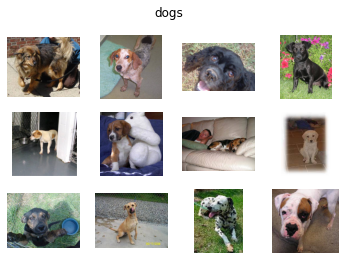

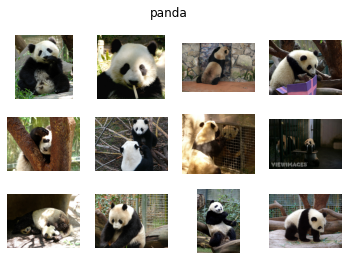

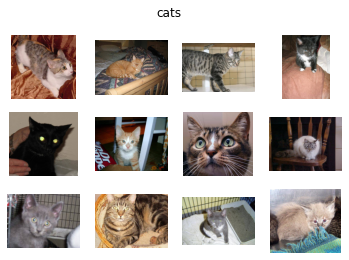

In [ ]:
# отобразим некоторые изображения

for category in categories:
    fig, _ = plt.subplots(3,4) #строим график с тремя строками и четрьмя столбцами в сетке для каждой категории
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]): #Получить в произвольном порядке список имен файлов (где v - название файла) в директории/каталоге, объединяем имя папки (cats или dogs или panda) с путем папки animals, чтобы получить доступ к картинкам внутри каждой папки
        img = plt.imread(path+category+'/'+v) #Считывание изображения из файла в массив
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [ ]:
shape0 = [] #Инициализация пустого списка для высоты изображений
shape1 = [] #Инициализация пустого списка для ширины изображений

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0]) #добавляем значение высоты для каждого изображения в список
        shape1.append(plt.imread(path+category+'/'+ files).shape[1]) #добавляем значение ширины для каждого изображения в список
    print(category, ' => height min: ', min(shape0), 'width min: ', min(shape1))
    print(category, ' => height max: ', max(shape0), 'width max: ', max(shape1))
    #Изображения имеют разную форму
    shape0 = []
    shape1 = []

dogs  => height min:  50 width min:  59
dogs  => height max:  500 width max:  500
panda  => height min:  87 width min:  78
panda  => height max:  1200 width max:  1600
cats  => height min:  32 width min:  55
cats  => height max:  500 width max:  500


In [ ]:
#Поскольку изображения имеют разную форму, изменим размер изображений на высоту=32 и ширину=55

#Инициализируем два пустых списка данных и меток
data = []
labels = []
imagePaths = [] #Cписок из 3000 абсолютных путей к изображениям 
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # Добавляем в список в произвольном порядке пути к изображениям для каждой категории
                                                    # По 1000 путей для каждой категории. k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths) #Cлучайным образом перетасовываем названия изображений в списке путей к изображениям
print(imagePaths[:10])

# цикл по входным изображениям
for imagePath in imagePaths:
    image = cv2.imread(imagePath[0]) # считывание изображения в массив numpy
    image = cv2.resize(image, (WIDTH, HEIGHT))  # изменение размера изображения до 32x55 пикселей (игнорируя соотношение сторон)
                                                # после изменения формы размер всех изображений станет 32x55x3
    data.append(image) # сохранение изображения в списке данных
    
    label = imagePath[1] # извлечение метки класса из пути к изображению
    labels.append(label) # добавляем метку в список меток

[['/content/gdrive/MyDrive/animals/dogs/dogs_00300.jpg', 0], ['/content/gdrive/MyDrive/animals/cats/cats_00031.jpg', 2], ['/content/gdrive/MyDrive/animals/panda/panda_00524.jpg', 1], ['/content/gdrive/MyDrive/animals/cats/cats_00816.jpg', 2], ['/content/gdrive/MyDrive/animals/panda/panda_00031.jpg', 1], ['/content/gdrive/MyDrive/animals/dogs/dogs_00640.jpg', 0], ['/content/gdrive/MyDrive/animals/cats/cats_00591.jpg', 2], ['/content/gdrive/MyDrive/animals/cats/cats_00341.jpg', 2], ['/content/gdrive/MyDrive/animals/panda/panda_00805.jpg', 1], ['/content/gdrive/MyDrive/animals/cats/cats_00429.jpg', 2]]


In [ ]:
data = np.array(data, dtype="float") / 255.0 # нормализация входных данных (привод всех входов к интервалу от 0 до 1)
labels = np.array(labels) # преобразование списка меток в числовой массив формы (3000,)

In [ ]:
print(data.shape)

(3000, 32, 55, 3)


In [ ]:
print(labels.shape)

(3000,)


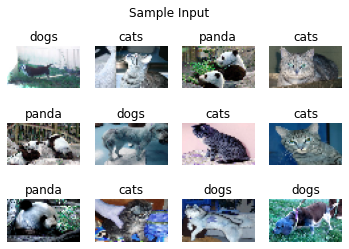

In [ ]:
#Проверим метки изображений
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [ ]:
# разделение данных на обучающие и тестовые фрагменты, используя 80%
# данных для обучения и оставшиеся 20% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
#Преобразование выходных данных с помощью one_hot_encoding
trainY = np_utils.to_categorical(trainY, 3)
testY = np_utils.to_categorical(testY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3, 3)
(600, 3)


In [ ]:
# определение архитектуры модели

model = Sequential()
#Cверточный слой Convolution2D, 32 карты признаков и ядро размера 2×2
model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
#Слой подвыборки MaxPooling2D с размером окна 2×2, который уменьшает количество объектов на карте объектов
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #Слой dropout со случайным исключением 20% нейронов в слое, чтобы уменьшить переобучение
model.add(Flatten()) # Преобразовании многомерного входного тензора в одномерный тензор с помощью Flatten. Это позволяет обрабатывать вывод стандартными Dense слоями
model.add(Dense(128, activation='relu')) # Danse слой из 128 нейронов
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) # Danse слой из 3 нейронов на выходе

In [ ]:
#Компиляция модели использует три параметра: оптимизатор, потери и метрики.
#Оптимизатор весов adam: метод стохастической оптимизации; функция потерь: категориальная перекрестная энтропия, метрика оценки качества: точность
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 13, 32)         0         
                                                                 
 flatten_1 (Flatten)         (None, 2912)             

In [ ]:
#Обучение сети
history = model.fit(trainX, trainY, batch_size=32, epochs=30, validation_split=0.1, verbose=1)

Epoch 1/30
68/68 [==============================] - 1s 7ms/step - loss: 0.9036 - accuracy: 0.5213 - val_loss: 0.7067 - val_accuracy: 0.6625
Epoch 2/30
68/68 [==============================] - 0s 5ms/step - loss: 0.7495 - accuracy: 0.6208 - val_loss: 0.7486 - val_accuracy: 0.6125
Epoch 3/30
68/68 [==============================] - 0s 5ms/step - loss: 0.7087 - accuracy: 0.6394 - val_loss: 0.6513 - val_accuracy: 0.7333
Epoch 4/30
68/68 [==============================] - 0s 5ms/step - loss: 0.6446 - accuracy: 0.6898 - val_loss: 0.6951 - val_accuracy: 0.5750
Epoch 5/30
68/68 [==============================] - 0s 5ms/step - loss: 0.6178 - accuracy: 0.7093 - val_loss: 0.6027 - val_accuracy: 0.7292
Epoch 6/30
68/68 [==============================] - 0s 5ms/step - loss: 0.5822 - accuracy: 0.7241 - val_loss: 0.5781 - val_accuracy: 0.7583
Epoch 7/30
68/68 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7333 - val_loss: 0.6152 - val_accuracy: 0.7042
Epoch 8/30
68/68 [==

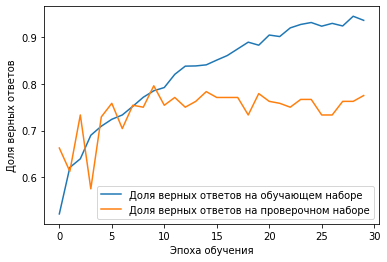

In [ ]:
#Графические представления точности обучения
#Возвращаемый объект "history" содержит записи значений потерь и метрик во время обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

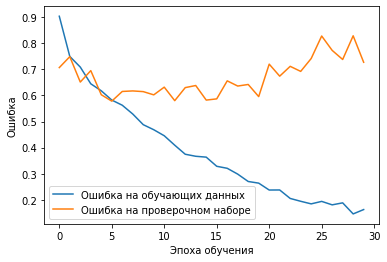

In [ ]:
#Графическое представление ошибки обучения:
plt.plot(history.history['loss'],label='Ошибка на обучающих данных')
plt.plot(history.history['val_loss'],label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Оценим модель на тестовых данных, используя "evaluate"
scores=model.evaluate(testX,testY,verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 70.50%


1/1 [==============================] - 0s 17ms/step
[[0.10298023 0.0725377  0.8244821 ]]
[2]
Prediction : cats


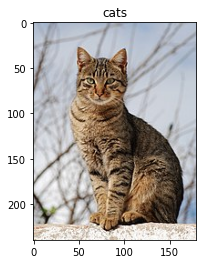

In [ ]:
#тестирование изображений

test_data=[]
test_image_o = cv2.imread('/content/gdrive/MyDrive/test_cat7.jpg')
test_image_o = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB) # перетасовки цветовых каналов из BGR в RGB
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # изменяем размер изображения
test_data.append(test_image)

test_data = np.array(test_image, dtype="float") / 255.0 # нормализация
test_data=test_data.reshape([1,32, 55, 3])
pred = model.predict(test_data) # Выводим массив вероятностей принадлежности тестируемого изображения к классам обученной нейросети
print(pred)
predictions = argmax(pred, axis=1) #получаем числовую метку класса (0 - собаки, 1 - панды, 2- кошки)
print(predictions)
print ('Prediction : '+categories[predictions[0]]) #получаем название класса

fig = plt.figure() # создаем область для отображения изображения
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

1/1 [==============================] - 0s 18ms/step
[[0.54440415 0.00065341 0.45494246]]
[0]
Prediction : dogs


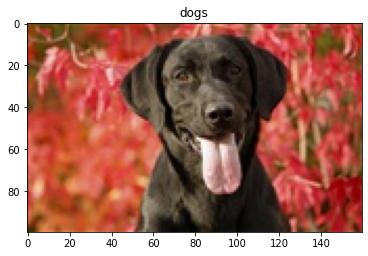

In [ ]:
test_data=[]
test_image_o = cv2.imread('/content/gdrive/MyDrive/test_dog12.jpg')
test_image_o = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB) # перетасовки цветовых каналов из BGR в RGB
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # изменяем размер изображения
test_data.append(test_image)

test_data = np.array(test_image, dtype="float") / 255.0 # нормализация
test_data=test_data.reshape([1,32, 55, 3])
pred = model.predict(test_data) # Выводим массив вероятностей принадлежности тестируемого изображения к классам обученной нейросети
print(pred)
predictions = argmax(pred, axis=1) #получаем числовую метку класса (0 - собаки, 1 - панды, 2- кошки)
print(predictions)
print ('Prediction : '+categories[predictions[0]]) #получаем название класса

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

1/1 [==============================] - 0s 16ms/step
[[2.5652908e-04 9.9974352e-01 2.6338492e-10]]
[1]
Prediction : panda


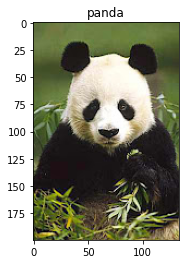

In [ ]:
test_data=[]
test_image_o = cv2.imread('/content/gdrive/MyDrive/test_panda1.jpg')
test_image_o = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB) # перетасовки цветовых каналов из BGR в RGB
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # изменяем размер изображения
test_data.append(test_image)

test_data = np.array(test_image, dtype="float") / 255.0 # нормализация
test_data=test_data.reshape([1,32, 55, 3])
pred = model.predict(test_data) # Выводим массив вероятностей принадлежности тестируемого изображения к классам обученной нейросети
print(pred)
predictions = argmax(pred, axis=1) #получаем числовую метку класса (0 - собаки, 1 - панды, 2- кошки)
print(predictions)
print ('Prediction : '+categories[predictions[0]]) #получаем название класса

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)